In [5]:
# Importing Python Addons
import json
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
# Culmulating Spotify Listening Data (17 Dec 2024 to 21 Dec 2025)
with open("Spotify Account Data/StreamingHistory_music_0.json", "r", encoding = "latin1") as file:
    g0 = json.load(file)
graph0 = pd.DataFrame(g0)
with open("Spotify Account Data/StreamingHistory_music_1.json", "r", encoding = "latin1") as file:
    g1 = json.load(file)
graph1 = pd.DataFrame(g1)
with open("Spotify Account Data/StreamingHistory_music_2.json", "r", encoding = "latin1") as file:
    g2 = json.load(file)
graph2 = pd.DataFrame(g2)
with open("Spotify Account Data/StreamingHistory_music_3.json", "r", encoding = "latin1") as file:
    g3 = json.load(file)
graph3 = pd.DataFrame(g3)
full = pd.concat([graph0, graph1, graph2, graph3], ignore_index=True)

In [19]:
print("General Stats")
print(f"Total Listen Time: {full['msPlayed'].sum()}ms")
ArtistList = full.drop_duplicates(subset = ["artistName"])
print(f"No of Artists : {len(ArtistList)}")
Playlist = full.drop_duplicates(subset = ["trackName"])
print(f"No of Songs: {len(Playlist)}")

Total Listen Time: 5940153929ms
No of Artists : 1758
No of Songs: 4045


Total Listen Time: 5940153929ms = 2 Months 5 Days 22 Hours 44 Minutes 38 Seconds (Assuming Month = 30 Days)
Average Per Day = 4 Hours 23 Minutes 29 Seconds

Insight: A large usage of time in the music application, with songs from a wide variety of artists, possible made up of many genres 

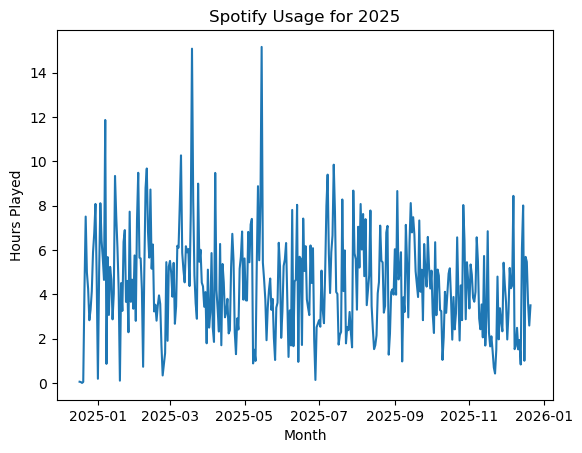

In [40]:
full["Date"] = pd.to_datetime(full["endTime"])
days = full.groupby(full["Date"].dt.date)["msPlayed"].sum()
plt.plot(days / 3600000)
plt.title("Spotify Usage for 2025")
plt.xlabel("Month")
plt.ylabel("Hours Played")
plt.show()

Insight: There seems to be no pattern in Spotify usage other than the mean being around 4 Hours. A few hour spikes are observed 
in the beginning part of the year, while there are none in the second.

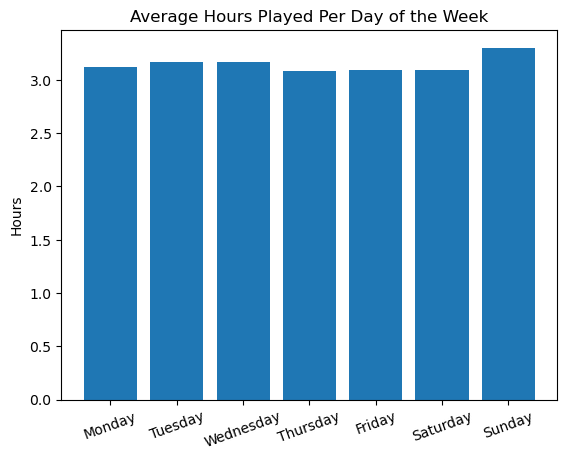

In [41]:
full = pd.concat([graph0, graph1, graph2, graph3], ignore_index=True)
full["Date"] = pd.to_datetime(full["endTime"])
days = full.groupby(full["Date"].dt.day_name())["msPlayed"].mean()
days = days.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
days = days/(1000*60)
plt.bar(days.index, days)
plt.xticks(rotation=20)
plt.ylabel("Hours")
plt.title("Average Hours Played Per Day of the Week")
plt.show()

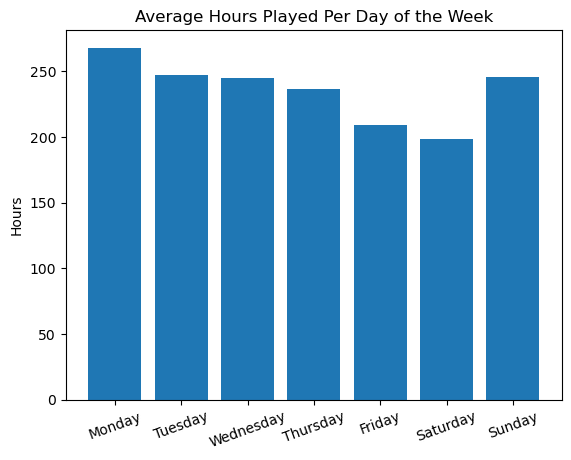

In [42]:
full["Date"] = pd.to_datetime(full["endTime"].str[:-6])
full["Day"] = full["Date"].dt.day_name()
days = full.groupby("Day")["msPlayed"].sum()
days = days / 3600000
days = days.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.bar(days.index, days)
plt.xticks(rotation=20)
plt.ylabel("Hours")
plt.title("Average Hours Played Per Day of the Week")
plt.show()

Insight: This shows that the Spotify usage is consistent regardless of Weekday or Weekend except for Saturday, with a drop of usage
as compared to the other days

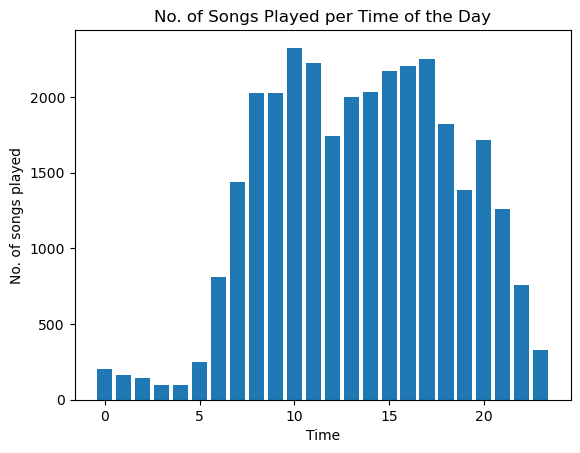

In [43]:
full["endTime"] = pd.to_datetime(full["endTime"])
hr = full["endTime"].dt.hour
mhr = hr.value_counts()
mhre = mhr.rename({0:8,1:9,2:10,3:11,4:12,5:13,6:14,7:15,8:16,9:17,10:18,11:19,12:20,13:21,14:22,15:23,16:0,17:1,18:2,19:3,20:4,21:5, 22:6, 23:7})
mhra = mhre.reindex([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.bar(mhra.index, mhra)
plt.ylabel("No. of songs played")
plt.xlabel("Time")
plt.title("No. of Songs Played per Time of the Day")
plt.show()

In [ ]:
Insight: This describes the behavioral pattern of the user, with high usage in the morning and afternoon that spreads out
thought the day, and low usage at night. Exceptions are seen at the values at 12pm and 7pm, where drops of songs played are
observed

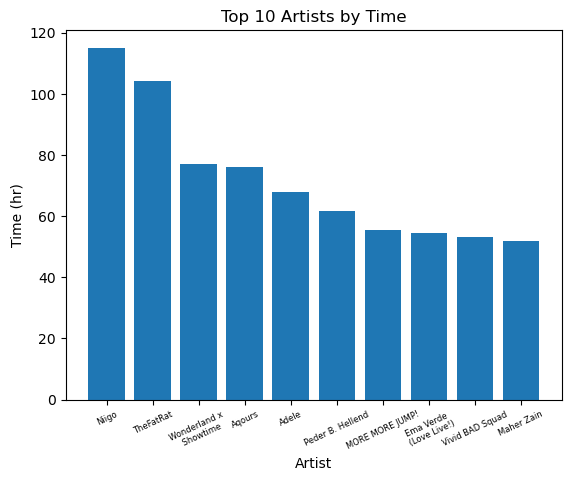

In [45]:
art = full.groupby("artistName")["msPlayed"].sum()
art = art.sort_values(ascending=False)
art = art/(1000*60*24)
arttop = art.nlargest(10)
plt.bar(["Niigo", "TheFatRat", "Wonderland x\n Showtime", "Aqours", "Adele", "Peder B. Hellend", "MORE MORE JUMP!", "Ema Verde\n (Love Live!)", "Vivid BAD Squad", "Maher Zain"], arttop)
plt.ylabel("Time (hr)")
plt.xlabel("Artist")
plt.title("Top 10 Artists by Time")
plt.xticks(rotation=25, fontsize=6)
plt.show()

Insights: The following data provides further evidence of the users diverse library of songs, with almost all of their top 10 
artists belonging either of a different genre or language

In [ ]:
Overall, this notebook can be used by everyone to analyse their own data with the json files that Spotify would provide. However,
given that Python/Pandas does not support the use of foreign language, I was forced to change some of the names of the top artists
into their known English names. The notebook also supports a 4 file streaming history dataset, and has to be changed if the user
has been given a different number of datasets by Spotify